In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

import seaborn as sns
import numpy as np
import pandas as pd

carData = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [37]:
carData.columns

X = carData[carData.columns.difference(['selling_price'])]
y = carData.iloc[:, -6]
print(X.head())
print(y.head())

     fuel  km_driven                      name         owner seller_type  \
0  Petrol      70000             Maruti 800 AC   First Owner  Individual   
1  Petrol      50000  Maruti Wagon R LXI Minor   First Owner  Individual   
2  Diesel     100000      Hyundai Verna 1.6 SX   First Owner  Individual   
3  Petrol      46000    Datsun RediGO T Option   First Owner  Individual   
4  Diesel     141000     Honda Amaze VX i-DTEC  Second Owner  Individual   

  transmission  year  
0       Manual  2007  
1       Manual  2007  
2       Manual  2012  
3       Manual  2017  
4       Manual  2014  
0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64


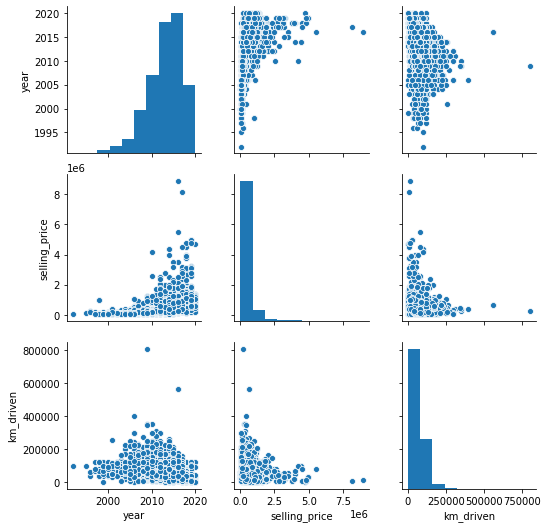

In [36]:
sns.pairplot(carData) #Show relationship between all the features in the dataset

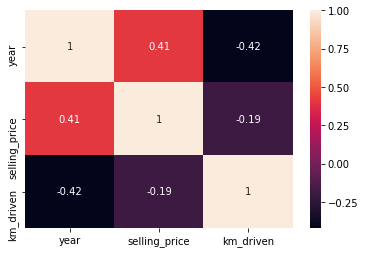

In [38]:
corr_mat = carData.corr().round(2)
sns.heatmap(data=corr_mat, annot=True)

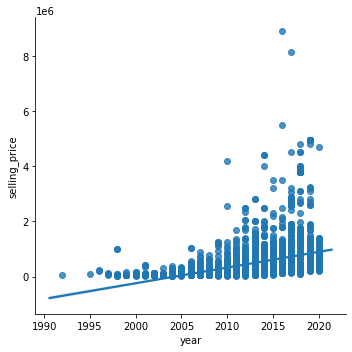

In [42]:
sns.lmplot(x = 'year', y = 'selling_price', data = carData)

In [40]:
cols2trans = [0,2,3,4,5]
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), cols2trans)], remainder='passthrough')

X_counts = columnTransformer.fit_transform(X)
print(X.shape)
print(X_counts.shape) #notice extra cols

(4340, 7)
(4340, 1508)


In [41]:
reg = LinearRegression().fit(X_counts, y)
print(reg.score(X_counts, y))
print(reg.coef_)
print(reg.intercept_)

0.9799261897460708
[-2.93621365e+04  2.83161859e+05 -2.67575286e+05 ... -3.93185924e+05
 -5.56638870e-01  3.33729904e+04]
-66407490.31477888


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size = 0.2, random_state = 10)

In [30]:
lm = LinearRegression().fit(X_train, y_train)

LinearRegression()

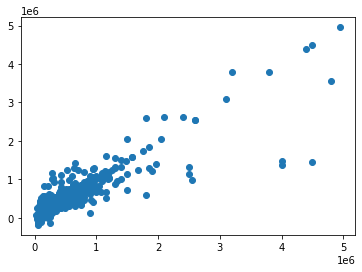

In [31]:
import matplotlib.pyplot as plt

prediction = lm.predict(X_test)

plt.scatter(y_test, prediction)

In [32]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':prediction})
df2 = df1.head(10)
df2

,Actual,Predicted
1234,300000,3.101375e+05
3327,600000,4.012697e+05
1563,170000,1.845413e+05
2364,925000,7.078387e+05
2487,400000,3.486095e+05
2840,300000,4.703264e+05
1274,430000,3.529819e+05
237,90000,4.439656e+05
968,4000000,1.372300e+06
2283,85000,4.279787e+04


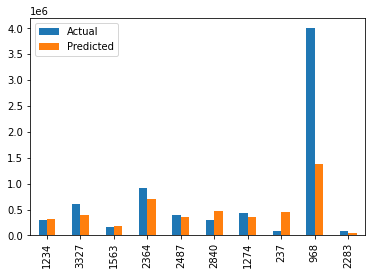

In [35]:
df2.plot(kind = 'bar')